<a href="https://colab.research.google.com/github/Kisame2510/A.I-Training/blob/main/test/4loaibanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://drive.google.com/drive/folders/1a0LL6pdkq9bpkDDNKavNC3XIp5fYGiGI?usp=sharing
## data

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [18]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/TEST/train/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')
test_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/TEST/test/',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 80 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [19]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [20]:
history=model.fit(train_dataset,batch_size=15,epochs=10,verbose=1,validation_data=test_dataset)

Epoch 1/10
6/6 [==============================] - 5s 778ms/step - loss: 1.6718 - accuracy: 0.4750
Epoch 2/10
6/6 [==============================] - 5s 808ms/step - loss: 0.9704 - accuracy: 0.6625
Epoch 3/10
6/6 [==============================] - 5s 756ms/step - loss: 0.5787 - accuracy: 0.8125
Epoch 4/10
6/6 [==============================] - 5s 872ms/step - loss: 0.6079 - accuracy: 0.7750
Epoch 5/10
6/6 [==============================] - 5s 764ms/step - loss: 0.4721 - accuracy: 0.8125
Epoch 6/10
6/6 [==============================] - 5s 867ms/step - loss: 0.4309 - accuracy: 0.8500
Epoch 7/10
6/6 [==============================] - 5s 887ms/step - loss: 0.3971 - accuracy: 0.8875
Epoch 8/10
6/6 [==============================] - 5s 894ms/step - loss: 0.4546 - accuracy: 0.8250
Epoch 9/10
6/6 [==============================] - 5s 891ms/step - loss: 0.3339 - accuracy: 0.8625
Epoch 10/10
6/6 [==============================] - 5s 789ms/step - loss: 0.2357 - accuracy: 0.9125


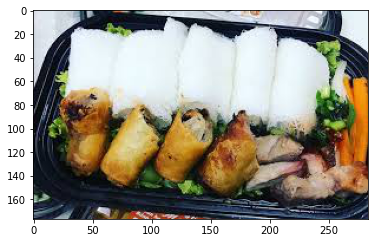

array([2])

In [21]:
filename = '/content/banhhoi.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

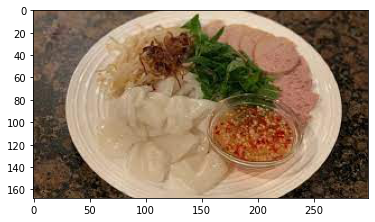

array([2])

In [22]:
filename = '/content/banhuot.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

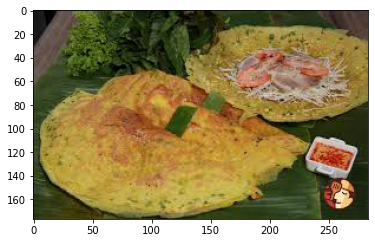

array([2])

In [23]:
filename = '/content/banhxeo.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)